In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "../../all_data/concatenated_transcript_LDA_file.csv"
df = pd.read_csv(path)
df

,text,token_count
0,จุดจุดจุด อ่ะก่อนอื่น คนเรือง เลือดสำคัญต่อก็ค...,964
1,ก็ได้เสียงประมาณนั้นคล้ายคล้ายกับแคลคูลัสใช่ไห...,970
2,แม้ว่าโจทย์เราจะทำโจทย์ทุกอันให้มีความจริงอยู่...,979
3,ซิทีฟ เป็น office ไม่ใช่ media ฟังก์ชัน นะครับ...,949
4,สมการนี้ เอ๊ะเราจะหายังไงดี ถ้ามองเป็นมุมมองขอ...,953
...,...,...
325,บิลโอเค ก่อนโยกครั้นถัดไปครับ ไม่ได้นะครับในบา...,965
326,ไปอัพเดทท็อปในการเลือก ไปอัพเดทในการเลือกอัพเด...,999
327,นะครับแต่สิ่งที่ผมอยากให้ได้ไปเนี่ยวิชานี้คือ ...,930
328,แล้วคุณเลือกสวิตช์ไหนบ้าง งาน ทีนี้อีกอันนึงที...,896


# Tokenize data

In [140]:
import re
from pythainlp import word_tokenize
from pythainlp.corpus import thai_stopwords

stopword = thai_stopwords()

def preprocess(text):
  token_ls = word_tokenize(text,keep_whitespace=False,engine='attacut')
  result = []
  for token in token_ls:
    if len(token) > 3 and token not in stopword:
      result.append(token)
  return result

In [141]:
df['token_ls'] = df['text'].apply(lambda x: preprocess(x))

In [142]:
df.head(3)

,text,token_count,token_ls
0,จุดจุดจุด อ่ะก่อนอื่น คนเรือง เลือดสำคัญต่อก็ค...,964,"[เรือง, เลือด, สัปดาห์, หน้า, เทอม, ออกภาพ, เด..."
1,ก็ได้เสียงประมาณนั้นคล้ายคล้ายกับแคลคูลัสใช่ไห...,970,"[เสียง, แคลคูลัส, เรียน, แอลกูลัสเยฉะนั้น, โจท..."
2,แม้ว่าโจทย์เราจะทำโจทย์ทุกอันให้มีความจริงอยู่...,979,"[โจทย์, โจทย์, เอกซ์, ผลิต, ครึ่ง, ทีวี, ร้อย,..."


In [143]:
df.token_count.sum()

303306

In [144]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import gensim

In [145]:
#  bigram for english
# from gensim.models.phrases import Phrases, Phraser

# # check english word
# def is_eng(word):
#   eng = 'abcdefghijklmnopqrstuvwxyz'
#   word = word.lower()
#   for e in word:
#     if (e not in eng): return False
#   return True

# def change_to_bigram(row):
#   return_ls = row['token'].copy()
#   if (row['bigram'] == []): return return_ls
#   for e in row['bigram']:
#     token_ls = e.split()
#     if (len(token_ls) > 2): return return_ls
#     if (is_eng(token_ls[0]) and is_eng(token_ls[1])):
#       idx = return_ls.index(token_ls[0])
#       return_ls[idx] = e
#       return_ls.pop(idx+1)
#   return return_ls

# bigram_ls = []
# phrases = Phrases(df, min_count=1, threshold=100)
# phraser = Phraser(phrases)
# for sentence in df:
#     transformed_sentence = phraser[sentence]
#     phrase_list = [phrase.replace("_", " ") for phrase in transformed_sentence if "_" in phrase]
#     bigram_ls.append(phrase_list)
# df['bigram'] = bigram_ls
# df['token_with_bigram'] = df.apply(change_to_bigram,axis=1)

ValueError: Length of values (3) does not match length of index (330)

In [ ]:
dictionary = gensim.corpora.Dictionary(df['token_ls'])
print(len(dictionary))
dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=None)
print(len(dictionary))

# bow_corpus is embedding vector of each sentence
bow_corpus = [dictionary.doc2bow(doc) for doc in df['token_ls']]


9697
2723


In [ ]:
len(bow_corpus[1])

89

In [ ]:
# create dic for count word (do stop word)
count_word = [[i,0] for i in range(len(dictionary))]

for i in range(len(bow_corpus)):
  for j in range(len(bow_corpus[i])):
    word_idx,freq = bow_corpus[i][j]
    count_word[word_idx][1] += freq

sort_freq = sorted(count_word, key=lambda x: x[1], reverse=True)

In [ ]:
for idx,freq in sort_freq:
  print(dictionary[idx],freq,round((freq)*100/len(dictionary),3))

เอ็น 653 23.981
โอเมก้า 433 15.902
ก้อน 413 15.167
เจ้าตัว 398 14.616
โจทย์ 397 14.58
สูตร 390 14.322
เรียน 365 13.404
หน้าตา 338 12.413
เนาะ 319 11.715
ไหร่ 304 11.164
เอ่อ 261 9.585
ข้อมูล 261 9.585
วิธี 258 9.475
เลือก 257 9.438
รูปแบบ 237 8.704
ตัวอย่าง 235 8.63
สมมุติ 234 8.593
สมการ 232 8.52
อ่าน 230 8.447
เก้า 217 7.969
เปอร์เซ็นต์ 209 7.675
เดลต้า 208 7.639
จำนวน 204 7.492
สุดท้าย 203 7.455
บ้าน 194 7.124
หมาย 185 6.794
ร้อย 184 6.757
เปล่า 180 6.61
คำนวณ 179 6.574
เล่น 175 6.427
ระบบ 170 6.243
โอกาส 165 6.059
เอ็ม 158 5.802
เรื่อยเรื่อย 153 5.619
ฟังก์ชัน 152 5.582
อียก 152 5.582
เส้น 151 5.545
integrate 143 5.252
สัญญา 143 5.252
สนใจ 136 4.994
ซื้อ 136 4.994
เพื่อน 134 4.921
แปลง 134 4.921
นะนะ 132 4.848
ชื่อ 131 4.811
convolution 129 4.737
เหลี่ยม 128 4.701
งั้น 126 4.627
เจ็ด 126 4.627
พิจารณา 121 4.444
หลัก 117 4.297
กลาย 117 4.297
transform 112 4.113
สำหรับ 111 4.076
ซ้าย 111 4.076
ปุ๊บ 110 4.04
input 110 4.04
ฟังก์ชั่น 110 4.04
วิชา 109 4.003
เหรียญ 109 4.003
เฉลี่ย 107 

In [ ]:
add_stop_word = []
thresh = 11
for idx,freq in sort_freq:
  percent = round((freq)*100/len(dictionary),2)
  if (percent < thresh) : break
  add_stop_word.append(idx)

print(len(add_stop_word))
# delete stop word
for sentence in bow_corpus:
  idx = []
  for i in range(len(sentence)):
    if (sentence[i][0] in add_stop_word):
      idx.append(i)

  idx.sort(reverse=True)
  for j in range(len(idx)):
    sentence.pop(idx[j])

10


In [ ]:
bow_doc_01 = bow_corpus[1]
print(len(bow_doc_01))
for i in range(len(bow_doc_01)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_01[i][0],
                                               dictionary[bow_doc_01[i][0]], bow_doc_01[i][1]))

86
Word 3 ("data") appears 1 time.
Word 5 ("force") appears 1 time.
Word 8 ("optimization") appears 7 time.
Word 16 ("กระบวนการ") appears 1 time.
Word 21 ("จำนวน") appears 3 time.
Word 22 ("จินตนาการ") appears 1 time.
Word 23 ("ต่างต่าง") appears 1 time.
Word 27 ("นั่ง") appears 1 time.
Word 37 ("วิชา") appears 2 time.
Word 42 ("สมมติ") appears 2 time.
Word 51 ("หมาย") appears 2 time.
Word 60 ("อ่าน") appears 5 time.
Word 68 ("เปอร์เซ็นต์") appears 1 time.
Word 77 ("เสียง") appears 2 time.
Word 78 ("เอ่อ") appears 1 time.
Word 89 ("active") appears 1 time.
Word 90 ("ative") appears 1 time.
Word 91 ("center") appears 1 time.
Word 92 ("core") appears 1 time.
Word 93 ("decision") appears 2 time.
Word 94 ("dicision") appears 1 time.
Word 95 ("dison") appears 1 time.
Word 96 ("facebook") appears 1 time.
Word 97 ("feature") appears 4 time.
Word 98 ("from") appears 1 time.
Word 99 ("learning") appears 2 time.
Word 100 ("location") appears 1 time.
Word 101 ("machine") appears 1 time.
Word 102 

2024-02-26:02:45:47 WARNING  [gensim.models.ldamulticore:253] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-02-26:02:46:03 WARNING  [gensim.models.ldamulticore:253] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-02-26:02:46:18 WARNING  [gensim.models.ldamulticore:253] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-02-26:02:46:34 WARNING  [gensim.models.ldamulticore:253] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-02-26:02:46:49 WARNING  [gensim.models.ldamulticore:253] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-02-26:02:47:05 WARNING  [gensim.models.ldamulticore:253] too few updates, traini

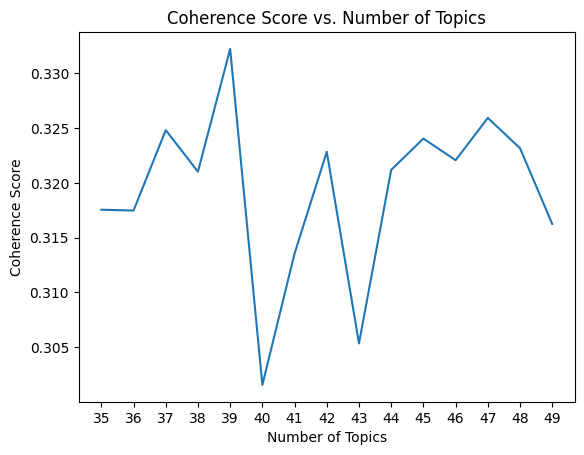

Optimal number of topics: 39


In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
import matplotlib.pyplot as plt

# Define range of candidate numbers of topics
num_topics_range = range(35, 42)
# TOPIC = 28
gensim_seed = 11
# Calculate coherence scores
coherence_scores = []
for num_topics in num_topics_range:
    lda_model = LdaMulticore(bow_corpus, num_topics=num_topics, \
                                       id2word=dictionary, passes=2, workers=2, \
                                       random_state=gensim_seed)
    coherence_model = CoherenceModel(model=lda_model, texts=df['token_ls'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plot coherence scores
plt.plot(num_topics_range, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(num_topics_range)
plt.show()

# Find optimal number of topics
optimal_num_topics = num_topics_range[np.argmax(coherence_scores)]
print("Optimal number of topics:", optimal_num_topics)

In [146]:
random_seed = 11
gensim_seed = gensim.utils.get_random_state(random_seed)
TOPIC = 39
num_topic = optimal_num_topics
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=num_topic, \
                                       id2word=dictionary, passes=2, workers=2, \
                                       random_state=gensim_seed)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

2024-02-26:05:15:22 WARNING  [gensim.models.ldamulticore:253] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


Topic: 0 
Words: 0.021*"ซื้อ" + 0.013*"transform" + 0.012*"ลูกค้า" + 0.012*"เอ่อ" + 0.011*"ร้อย" + 0.011*"เอ็ด" + 0.011*"วิธี" + 0.011*"เดือน" + 0.011*"เจเค" + 0.009*"สมมุติ"
Topic: 1 
Words: 0.020*"เก้า" + 0.017*"ข้อมูล" + 0.011*"คำนวณ" + 0.010*"สุดท้าย" + 0.010*"customer" + 0.010*"เปอร์เซ็นต์" + 0.010*"เพื่อน" + 0.009*"ร้อย" + 0.009*"ล็อค" + 0.009*"เอ่อ"
Topic: 2 
Words: 0.021*"ข้อมูล" + 0.013*"อ่าน" + 0.012*"นะนะ" + 0.012*"สมมุติ" + 0.012*"เอ่อ" + 0.010*"คะแนน" + 0.009*"เหลี่ยม" + 0.009*"ตัวอย่าง" + 0.009*"สัญญา" + 0.009*"อธิบาย"
Topic: 3 
Words: 0.027*"power" + 0.017*"ข้อมูล" + 0.013*"เอ่อ" + 0.012*"ตัวอย่าง" + 0.012*"หมาย" + 0.012*"คำนวณ" + 0.011*"เหรียญ" + 0.009*"ปกติ" + 0.009*"data" + 0.009*"สนใจ"
Topic: 4 
Words: 0.031*"integrate" + 0.022*"เล่น" + 0.018*"ซ้ำกัน" + 0.016*"เลื่อน" + 0.015*"เส้น" + 0.013*"คีย์" + 0.013*"งั้น" + 0.013*"เหลี่ยม" + 0.013*"เช็ค" + 0.012*"ทาว์"
Topic: 5 
Words: 0.018*"จำนวน" + 0.014*"ซื้อ" + 0.011*"ลูกค้า" + 0.011*"เก้า" + 0.010*"สมมุติ" + 0.010*"หลักห

In [72]:
unseen_document = ' 0.023*"สุดท้าย" + 0.017*"เส้น" + 0.014*"เบต้า" + 0.013*"สนใจ" + 0.013*"ซื้อ"'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
print(lda_model[bow_vector])
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

[(35, 0.8376055)]
Score: 0.8376054763793945	 Topic: 0.023*"สุดท้าย" + 0.017*"เส้น" + 0.014*"เบต้า" + 0.013*"สนใจ" + 0.013*"ซื้อ"


In [73]:
import sys
import pandas as pd
from sentence_transformers import SentenceTransformer

sys.path.append("../")
from evaluation.evaluate_LDA2 import Evaluation

c:\Users\pacha\miniconda3\envs\capstone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [86]:
tmp = pd.read_csv("../../labeled/labeled_transcript_02.csv", index_col=0)
new_tmp = get_topic_distribution(lda_model, tmp, "text")

In [128]:
# torch.tensor(np.stack(tmp.topic_distribution.to_numpy()))

In [118]:
for i in new_tmp["topic_distribution"]:
    print(i)

[0.01282062 0.01282062 0.01282062 0.01282062 0.01282062 0.01282062
 0.01282062 0.01282062 0.01282062 0.01282062 0.01282062 0.01282062
 0.01282062 0.51281625 0.01282062 0.01282062 0.01282062 0.01282062
 0.01282062 0.01282062 0.01282062 0.01282062 0.01282062 0.01282062
 0.01282062 0.01282062 0.01282062 0.01282062 0.01282062 0.01282062
 0.01282062 0.01282062 0.01282062 0.01282062 0.01282062 0.01282062
 0.01282062 0.01282062 0.01282062]
[0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103]
[0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103
 0.02564103 0.02564103 0.02564103 0.02564103 0.02564103 0.0

In [129]:
def tokenizer_text(text):
  token_ls = word_tokenize(text,keep_whitespace=False,engine='attacut')
  return token_ls

In [130]:
def get_topic_distribution(lda_model, dataframe, dictionary, text_column, tokenize_func):
        """
        Get topic distribution scores for each document in the DataFrame using the given LDA model.

        Parameters:
            lda_model (gensim.models.ldamodel.LdaModel): Gensim LDA model.
            dataframe (pandas.DataFrame): DataFrame containing the text column.
            text_column (str): Name of the text column in the DataFrame.

        Returns:
            pandas.DataFrame: DataFrame with an additional column containing topic distribution scores.
        """
        topic_scores = []

        # Initialize an empty list to store topic distribution scores for each document
        for index, row in dataframe.iterrows():
        # Convert the document text to bag-of-words representation using the dictionary
            bow = dictionary.doc2bow(tokenize_func(row[text_column]))
            
            # Infer the topic distribution for the document using the LDA model
            doc_topics = lda_model.get_document_topics(bow)
            
            # Extract the topic distribution scores from the result
            scores = np.zeros(lda_model.num_topics)  # Initialize scores array
            for topic, score in doc_topics:
                scores[topic] = score
            
            # Append the topic scores to the list
            topic_scores.append(scores)
        
        # Add the topic distribution scores as a new column in the DataFrame
        dataframe['topic_distribution'] = topic_scores
        
        return dataframe

In [133]:
def eval_asr():
    result_dct = {  'filename':[],
                    'model':[],
                    'number_of_embedding_entry': [],
                    'embedding_time': [],
                    'embedding_time_per_entry': [],
                    'mean_hit@10': [],
                    'map@10': [],
                    'mean_hit@5': [],
                    'map@5': [],
                    'mean_hit@3': [],
                    'map@3': [],
                    'mean_hit@1': [],
                    'map@1': [],
                }
    evaluation = Evaluation()
    data_filenames = ["../../labeled/labeled_transcript_01.csv", "../../labeled/labeled_transcript_02.csv", "../../labeled/labeled_transcript_03.csv", "../../labeled/labeled_transcript_04.csv"]
    model_name = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
    max_seq_length=128
    model = SentenceTransformer(model_name)
    model.max_seq_length = max_seq_length
    for filename in data_filenames:
        df = pd.read_csv(filename, index_col=0)
        df = get_topic_distribution(lda_model, df, dictionary, "text", tokenize_func = tokenizer_text)
        report = evaluation.get_st_report(df, model, lda_model, dictionary,tokenizer_func= tokenizer_text, k_list=[10, 5, 3, 1])
        result_dct["filename"].append(filename)
        result_dct["model"].append(model_name)
        for key in report.keys():
            result_dct[key].append(report[key])

    final_df = pd.DataFrame(data = result_dct)
    return final_df

In [139]:
final_report = eval_asr()

Embedding context


Batches: 100%|██████████| 5/5 [00:23<00:00,  4.75s/it]


tensor([[ 0.0321,  0.0883, -0.0169,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0651,  0.0155, -0.0116,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0315,  0.1314, -0.0146,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0730,  0.1064, -0.0138,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0132, -0.0535, -0.0112,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0053,  0.2759, -0.0181,  ...,  0.0256,  0.0256,  0.0256]],
       dtype=torch.float64)
Predicting


 25%|██▌       | 1/4 [00:00<00:01,  1.51it/s]

[[49, 54, 48, 47, 51, 143, 100, 107, 130, 45], [51, 49, 54, 130, 44, 148, 131, 48, 52, 115], [130, 143, 41, 100, 119, 122, 80, 59, 42, 49], [115, 113, 63, 112, 130, 145, 64, 111, 117, 65], [54, 65, 64, 130, 133, 101, 61, 68, 63, 131], [17, 11, 16, 15, 49, 14, 42, 12, 30, 79], [17, 33, 49, 42, 113, 115, 130, 124, 11, 145], [47, 107, 54, 59, 64, 49, 122, 63, 51, 68], [80, 81, 42, 41, 120, 79, 124, 119, 113, 130], [54, 65, 130, 64, 133, 101, 68, 63, 154, 131]]
[[49, 50, 51], [51, 52, 53, 54], [79, 80, 81], [117, 118, 119, 120, 121, 122, 123, 124, 125], [130, 131, 132, 133, 134], [11, 12, 13, 14], [27], [58], [82, 83, 84, 85, 86, 87, 88, 89, 90], [135, 136, 137, 138, 139]]


 50%|█████     | 2/4 [00:01<00:01,  1.56it/s]

[[49, 54, 48, 47, 51], [51, 49, 54, 130, 44], [130, 143, 41, 100, 119], [115, 113, 63, 112, 130], [54, 65, 64, 130, 133], [17, 11, 16, 15, 49], [17, 33, 49, 42, 113], [47, 107, 54, 59, 64], [80, 81, 42, 41, 120], [54, 65, 130, 64, 133]]
[[49, 50, 51], [51, 52, 53, 54], [79, 80, 81], [117, 118, 119, 120, 121, 122, 123, 124, 125], [130, 131, 132, 133, 134], [11, 12, 13, 14], [27], [58], [82, 83, 84, 85, 86, 87, 88, 89, 90], [135, 136, 137, 138, 139]]


 75%|███████▌  | 3/4 [00:01<00:00,  1.55it/s]

[[107, 49, 143], [51, 49, 54], [130, 143, 41], [115, 113, 63], [54, 65, 64], [17, 11, 16], [17, 33, 49], [47, 107, 54], [80, 81, 42], [54, 65, 130]]
[[49, 50, 51], [51, 52, 53, 54], [79, 80, 81], [117, 118, 119, 120, 121, 122, 123, 124, 125], [130, 131, 132, 133, 134], [11, 12, 13, 14], [27], [58], [82, 83, 84, 85, 86, 87, 88, 89, 90], [135, 136, 137, 138, 139]]


100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

[[49], [51], [130], [115], [54], [17], [17], [47], [80], [54]]
[[49, 50, 51], [51, 52, 53, 54], [79, 80, 81], [117, 118, 119, 120, 121, 122, 123, 124, 125], [130, 131, 132, 133, 134], [11, 12, 13, 14], [27], [58], [82, 83, 84, 85, 86, 87, 88, 89, 90], [135, 136, 137, 138, 139]]


Embedding context


Batches:  40%|████      | 2/5 [00:13<00:20,  6.68s/it]


KeyboardInterrupt: 

In [137]:
final_report

,filename,model,number_of_embedding_entry,embedding_time,embedding_time_per_entry,mean_hit@10,map@10,mean_hit@5,map@5,mean_hit@3,map@3,mean_hit@1,map@1
0,../../labeled/labeled_transcript_01.csv,sentence-transformers/paraphrase-multilingual-...,158,22.967071,0.145361,0.6,0.226508,0.4,0.282500,0.3,0.233333,0.1,0.1
1,../../labeled/labeled_transcript_02.csv,sentence-transformers/paraphrase-multilingual-...,154,21.989509,0.142789,0.8,0.432857,0.5,0.406111,0.5,0.416667,0.4,0.4
2,../../labeled/labeled_transcript_03.csv,sentence-transformers/paraphrase-multilingual-...,121,17.258912,0.142636,0.8,0.573452,0.8,0.670000,0.7,0.683333,0.7,0.7
3,../../labeled/labeled_transcript_04.csv,sentence-transformers/paraphrase-multilingual-...,221,35.443091,0.160376,1.0,0.472761,0.9,0.542778,0.7,0.550000,0.4,0.4


In [138]:
final_report.to_csv("LDA_feature.csv", index=False)